In [1]:
### time series

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
dates=pd.date_range('2016-05-01','2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [4]:
tmp1=pd.Series([80,92,82,85,97,84,78],index=dates)

tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [5]:
tmp2 = pd.Series(np.random.randint(60,100,size=7), index=dates)
tmp2

2016-05-01    73
2016-05-02    80
2016-05-03    60
2016-05-04    88
2016-05-05    81
2016-05-06    76
2016-05-07    86
Freq: D, dtype: int32

In [6]:
#tmp1, tmp2 이용해서 DataFrame 만들기
exam=pd.DataFrame({
    'Math' : tmp1,
    'Philosophy' : tmp2
})
exam

,Math,Philosophy
2016-05-01,80,73
2016-05-02,92,80
2016-05-03,82,60
2016-05-04,85,88
2016-05-05,97,81
2016-05-06,84,76
2016-05-07,78,86


In [7]:
#2016년 5월 5일 점수만 보기
exam.loc['2016-05-05']

Math          97
Philosophy    81
Name: 2016-05-05 00:00:00, dtype: int64

In [8]:
#5/4, 5/6, 5/7의 철학 점수만 보기
exam['Philosophy'][[3,5,6]]

2016-05-04    88
2016-05-06    76
2016-05-07    86
Name: Philosophy, dtype: int32

In [9]:
#수학점수와 철학점수의 차 구하기
#새로운 열에 추가

a=exam.Math - exam.Philosophy
exam['difference']=a

# exam['차'] = tmp1 - tmp2
exam

,Math,Philosophy,difference
2016-05-01,80,73,7
2016-05-02,92,80,12
2016-05-03,82,60,22
2016-05-04,85,88,-3
2016-05-05,97,81,16
2016-05-06,84,76,8
2016-05-07,78,86,-8


In [11]:
# 컬럼 이름 바꾸기
exam.rename(columns={'Math':'Mathmatics','difference':'diff'},inplace=True)
exam.columns

Index(['Mathmatics', 'Philosophy', 'diff'], dtype='object')

In [13]:
#exam에서 'diff' 칼럼을 지워주세요
exam.drop('diff',axis=1,inplace=True)
exam.head()

,Mathmatics,Philosophy
2016-05-01,80,73
2016-05-02,92,80
2016-05-03,82,60
2016-05-04,85,88
2016-05-05,97,81


In [14]:
#and , or 중 하나 사용(%,|)
#5/3, 5/4의 시험 점수를 데이터 프레임 형태로 가져오세요

exam[(exam.index=='2016-05-03') |(exam.index=='2016-05-04')]

,Mathmatics,Philosophy
2016-05-03,82,60
2016-05-04,85,88


In [17]:
#and , or 중 하나 사용(%,|)
#수학점수가 85점이상
#5/1~ 5/5

exam[(exam.Mathmatics>= 85) &(exam.index <'2016-05-05')]

,Mathmatics,Philosophy
2016-05-02,92,80
2016-05-04,85,88


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

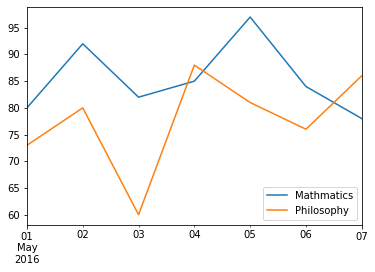

In [20]:
exam.plot()

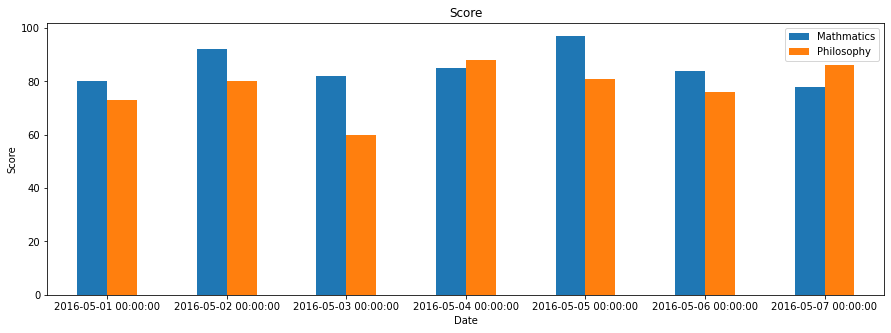

In [25]:
# 바 차트로 표현
exam.plot(title='Score',figsize=(15,5), kind = 'bar',rot=0)
plt.xlabel('Date')
plt.ylabel('Score')
plt.show()

# 영화 리뷰

In [3]:
#IMDB 영화리뷰데이터셋을 인터넷에서 불러오기
movies=pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv')
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [28]:
movies.shape

(979, 6)

### 영화상영시간이 200분 이상인 영화만 필터링 하기

In [34]:
booleans = []
for lenght in movies.duration:
    if lenght >= 200:
        booleans.append(True)
    else:
         booleans.append(False)

In [35]:
Is_long = pd.Series(booleans)
Is_long.head

<bound method NDFrame.head of 0      False
1      False
2       True
3      False
4      False
       ...  
974    False
975    False
976    False
977    False
978    False
Length: 979, dtype: bool>

In [32]:
movies[(movies.duration >= 200)]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


### 장르가 Crime 또는  Drama또는 Action인 영화리스트

In [36]:
movies[(movies.genre == 'Crime') |(movies.genre == 'Drama')|(movies.genre == 'Action')]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [37]:
# isin 사용
movies[movies.genre.isin(['Crime','Drama','Action'])].head(6)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


# 각 나라별 음주현황데이터 불러오기

In [55]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [83]:
#전체 데이터의 맥주 평균 소비량
drinks.beer_servings.mean()

106.16062176165804

In [85]:
#아프리카 대륙의 평균 소비량
drinks[drinks.continent=='Africa'].wine_servings.mean()

16.264150943396228

In [87]:
#각 대룩별 맥주 평균 소비량 
drinks.groupby('continent').beer_servings.mean()    # groupby : 기준을 정해서 보고 싶을때

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [88]:
#각 대룩별 맥주 최고 소비량 
drinks.groupby('continent').beer_servings.max()  

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [89]:
# 다양한 통계치를 한꺼번에 보기
drinks.groupby('continent').beer_servings.agg(['count','mean','min','max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [90]:
# 한국의 주류 소비량
k= drinks.loc [drinks['country'] == 'South Korea']
k

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
138,South Korea,140,16,9,9.8,Asia


In [91]:
# 맥주 소비량이 300 이상인 나라
drinks[(drinks.beer_servings >= 300)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
45,Czech Republic,361,170,134,11.8,Europe
62,Gabon,347,98,59,8.9,Africa
65,Germany,346,117,175,11.3,Europe
81,Ireland,313,118,165,11.4,Europe
98,Lithuania,343,244,56,12.9,Europe
117,Namibia,376,3,1,6.8,Africa
129,Palau,306,63,23,6.9,Oceania
135,Poland,343,215,56,10.9,Europe
188,Venezuela,333,100,3,7.7,South America


In [92]:
# 아시아의 주류 소비량
kr= drinks.loc [drinks['continent'] == 'Asia']
kr.head(7)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
12,Bahrain,42,63,7,2.0,Asia
13,Bangladesh,0,0,0,0.0,Asia
19,Bhutan,23,0,0,0.4,Asia
24,Brunei,31,2,1,0.6,Asia
30,Cambodia,57,65,1,2.2,Asia
36,China,79,192,8,5.0,Asia


In [93]:
%matplotlib inline

<AxesSubplot:xlabel='continent'>

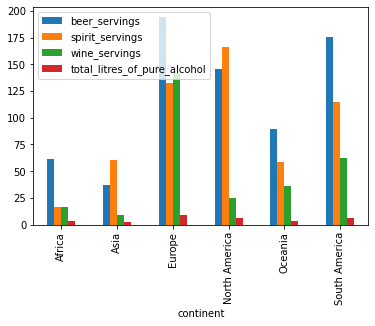

In [94]:
drinks.groupby('continent').mean().plot(kind='bar')